# Import Modules

**Run the cell below to import the relevant modules by running the cell. Select it and type ``shift`` + ``enter``.**

In [1]:
import os
import sys

ROOT_DIR = os.getcwd()[:os.getcwd().rfind('quantum_HEOM')] + 'quantum_HEOM'
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

import numpy as np
from scipy import constants as c

from quantum_heom import figures as figs
from quantum_heom import metadata as meta
from quantum_heom import utilities as util
from quantum_heom.quantum_system import QuantumSystem

# Introduction

* This notebook will outline the some of the different figures that can be plotted with quantum\_HEOM, both for a model 2-site system and the 7-site FMO complex found in green sulfur bacteria. 

* For the ``figures`` module imported above as ``figs``, the module docstring can be accessed by typing, in a code cell like the one below, ``figs.`` and then holding the ``shift`` key and pressing the ``tab`` key twice.

* You can then scroll through the docstring of the module to see the available methods:

In [ ]:
figs.

* The same can be done to see the parameters required for a given method within a module. For example, to see what arguments the ``plot_dynamics(...)`` method of the ``figures`` module takes, type ``figs.plot_dynamics(`` into a code cell. Then hold ``shift`` + ``tab`` + ``tab`` to see the method's docstring.

In [ ]:
figs.plot_dynamics(

## Normal Dynamics Plots

### a) 2-site system, HEOM model: density matrix elements and trace distance metric

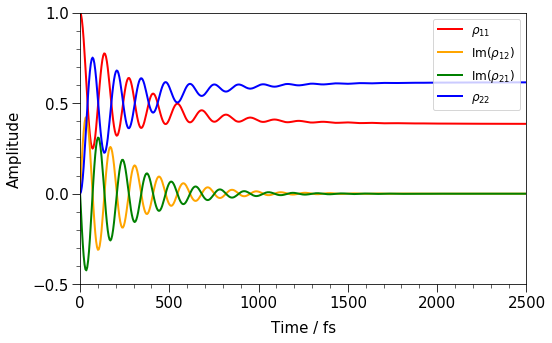

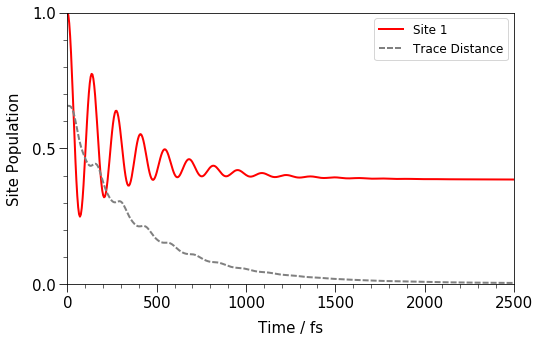

In [8]:
args1 = {'sites': 2,
         'interaction_model': 'spin-boson',
         'timesteps': 500,
         'time_interval': 5,
         'cutoff_freq': 20,
         'reorg_energy': 1,
         'temperature':  300,
         'deph_rate': 7,
         'epsi_delta': (20, 40),
         'matsubara_terms': 5,
         'bath_cutoff': 4, 
         }

q1 = QuantumSystem(dynamics_model='HEOM', **args1)

# 1st plot: all the elements of the density matrix elements; the site populations and the imaginary coherences
figs.plot_dynamics(q1, elements='all', coherences='imag')

# 2nd plot: the site 1 population and trace distance of the state relative to the canonical thermal state
figs.plot_dynamics(q1, elements=['11'], trace_measure='distance')

### b) FMO complex, local thermalising Lindblad model: site populations for different initial excitations

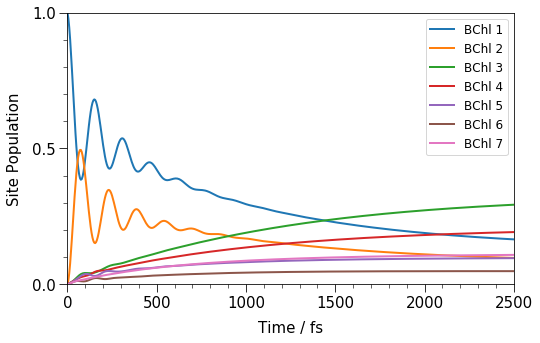

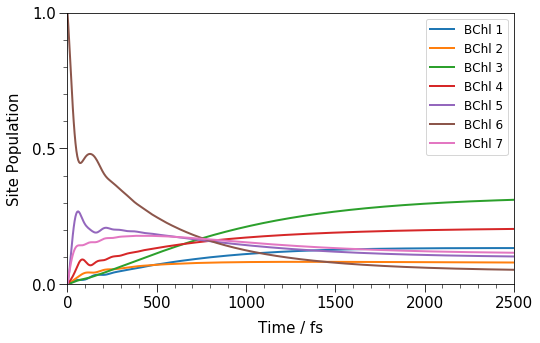

In [9]:
args1 = {'sites': 7,
         'interaction_model': 'FMO',
         'dynamics_model': 'local thermalising lindblad',
         'timesteps': 500,
         'cutoff_freq': util.unit_conversion(166, 'fs rad^-1', 'rad ps^-1'),
         'reorg_energy': util.unit_conversion(35, 'cm^-1', 'rad ps^-1'),
         'temperature': 300,
         'deph_rate': 11,
         'init_site_pop': [1],
         }

# Top plot: initial excitation on site 1, as specified in args1
q1 = QuantumSystem(**args1)
figs.plot_dynamics(q1, elements='diagonals')

# Bottom plot: initial excitation on site 6, set be reassigning the `init_site_pop` attribute of q1
q1.init_site_pop = [6]
figs.plot_dynamics(q1, elements='diagonals')

# Spectral Densities

Plotting the three different spectral densities; Debye, Ohmic, and Renger-Marcus. While this requires a ``QuantumSystem`` object to be defined, all parameters except the spectral density parameters ($\lambda$ and $\omega_c$) are trivial.

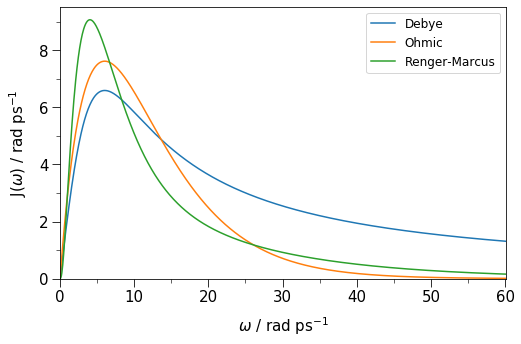

In [10]:
args1 = {'sites': 7,
         'interaction_model': 'FMO',
         'dynamics_model': 'local thermalising lindblad',
         'timesteps': 500,
         'cutoff_freq': util.unit_conversion(166, 'fs rad^-1', 'rad ps^-1'),
         'reorg_energy': util.unit_conversion(35, 'cm^-1', 'rad ps^-1'),
         'temperature': 300,
         'deph_rate': 11,
         'init_site_pop': [1],
         }

q1 = QuantumSystem(spectral_density='debye', **args1)
q2 = QuantumSystem(spectral_density='ohmic', **args1)
q3 = QuantumSystem(spectral_density='renger-marcus', **args1)

# Comparison of the forms of the spectral densities on the same curve
figs.plot_spectral_density([q1, q2, q3])